# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Zev Hadid Santoso]
- **Email:** [zevhadid@gmail.com]
- **ID Dicoding:** [MS108D5Y0533]

## Menentukan Pertanyaan Bisnis

- Apakah `temp` (suhu) berpengaruh kepada `cnt` (penyewaan sepeda)?

- Bagaimana pengaruh `workingday` (hari kerja) kepada `cnt`?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
# membaca dari file csv
day_df = pd.read_csv("sample_data/day.csv")

**Insight:**
- fungsi `read_csv()` dari library pandas digunakan untuk membaca file day.csv variabel `day_df` sebagai `DataFrame`.

### Assessing Data

In [ ]:
print("------------------------")
print("nilai kosong:")
print("------------------------")
print(day_df.isna().sum())

print()
print("------------------------")
print("nilai duplikat:")
print("------------------------")
print(day_df.duplicated().sum())

print()
print("------------------------")
print("nilai nilai statistik umum:")
print("------------------------")
print(day_df.describe())

print()
print("------------------------")
print("info dataset umum:")
print("------------------------")
print(day_df.info())

**Insight:**
- Pada bagian sini saya melakukan pengecekkan nilai nilai kosong atau duplikat pada dataset menggunakan fungsi `isna().sum()` dan `duplicated()`.
- Kemudian saya menggunakan `info()` untuk melihat struktur umum `DataFrame`.
- Saya juga menggunakan `describe()` untuk melihat nilai statistik umum seperti nilai mean, median, max dll.

### Cleaning Data

In [5]:
# melakukan konversi tipe data kolomn dteday menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

**Insight:**
- Datanya bagus karena pada proses *Assessing Data* saya tidak menemukan nilai yang `null` atau `NaN` jadi saya tidak melakukan pembersihan menngunakan fungsi fungsi seperti `fillna()` atau `dropna()`.
- Salah satu kolom yang bisa saya benarkan hanya kolom `dteday` yang sepertinya kolom tanggal tetapi menggunakan `info()` dapat dilihat bahwa kolom tersebut bertipe data `object`. Jadi saya menggunakan fungsi pandas `to_datetime()` untuk melakukan konversi kolom dari tipe data `object` menjadi datetime supaya data tersebut dapat dilakukan pemrosesan secara gampang.

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
temp = day_df["temp"]
cnt = day_df["cnt"]
casual = day_df["casual"]
registered = day_df["registered"]
workingday = day_df["workingday"]

print("korelasi antara temp dan cnt:", temp.corr(cnt))
print("covariance antara temp dan cnt:", temp.cov(cnt))
print()

print("korelasi antara workingday dan casual:", workingday.corr(casual))
print("covariance antara workingday dan casual:", workingday.cov(casual))
print()

print("korelasi antara workingday dan registered:", workingday.corr(registered))
print("covariance antara workingday dan registered:", workingday.cov(registered))
print()

print("korelasi antara workingday dan cnt:", workingday.corr(cnt))
print("covariance antara workingday dan cnt:", workingday.cov(cnt))
print()

print("rata rata penyewaan sepeda pada hari kerja (1) dan hari libur (0):")
print(day_df.groupby("workingday").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}))

korelasi antara temp dan cnt: 0.6274940090334918
covariance antara temp dan cnt: 222.51470045305507

korelasi antara workingday dan casual: -0.5180441913348246
covariance antara workingday dan casual: -165.4838839645447

korelasi antara workingday dan registered: 0.303907117045917
covariance antara workingday dan registered: 220.60111875269388

korelasi antara workingday dan cnt: 0.061156063060520655
covariance antara workingday dan cnt: 55.11723478814906

rata rata penyewaan sepeda pada hari kerja (1) dan hari libur (0):
                    cnt       casual   registered
workingday                                       
0           4330.168831  1371.134199  2959.034632
1           4584.820000   606.570000  3978.250000


**Insight:**
- Saya ingin mencari korelasi antara `temp` dan cnt menggunakan fungsi `corr()`. Output yang saya dapatkan dari fungsi ini adalah nilai yang dekat ke nol berarti korelasinya tidak signifikan.
Karena korelasinya sedikit saya setelah itu mencoba `cov()` yang menghitung covariance antara kedua kolom. nilai yang saya dapatkan dari fungsi tersebut adalah nilai positif yang berarti gitu meningkatnya nilai `temp` maka nilai `cnt` akan ikut meningkat dan sebaliknya.
- Saya melakukan metode yang sama saat ingin mencari korelasi dan covariance dengab weekday dan korelasi juga dekat ke nol tetapi covariance nya positif. Jadi menggunakan `groupby()` untuk merubah nilai `workingday` menjadi kategori dan berdasarkan kategori tersebut saya mencari nilai mean dari `cnt` berdasarkan nilai `workingday`. Seperti nilai covariance yang saya dapat ternyata jika nilai `workingday` meningkat (bernilai 1) maka `cnt` juga meningkat.
- Untuk analisa yang lebih akurat saya juga menggunakan kolom `registered` (user yang sudah punya akun) dan `casual` (user yang menyewa sekali kali dan tidak punya akun) karena `cnt` merupakan kolom gabungan dari kedua kolom tersebut. Walaupun korelasi yang saya dapatkan antara kolom tersebut dengan `cnt` masih dekat nol, covariancenya berbeda. Sebelumnya, saya hanya menghitung perbedaan nilai mean `cnt` jika `workingday` bernilai `0` atau `1` dan perbedaan tidak begiti signifikan tetapi saat saya menggunakan fungsi `agg` untuk menghitung perbedaannya dengan `casual` dan `registered` ternyata perbedaan signifikan. Pada hari kerja, nilai rata rata `registered` meningkat sampai `1000` dan saat saya hitung covariance nya juga bernilai positif dan sebaliknya untuk `casual` di mana pada nilai covariance nya negatif dan pada hari kerja jumlahnya menurun.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

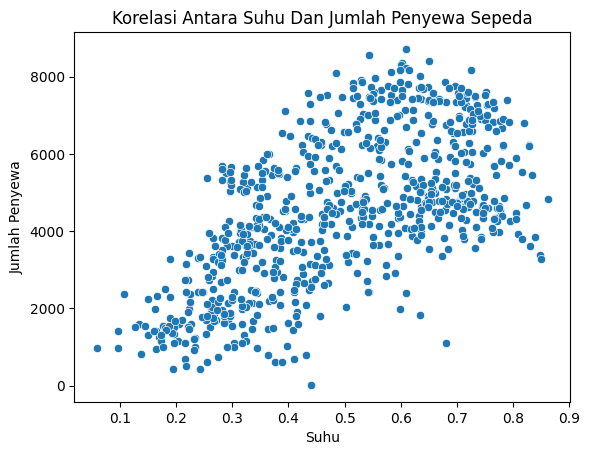

In [7]:
sns.scatterplot(x=day_df["temp"], y=cnt)

plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewa")
plt.title("Korelasi Antara Suhu Dan Jumlah Penyewa Sepeda")

plt.show()

### Pertanyaan 2:

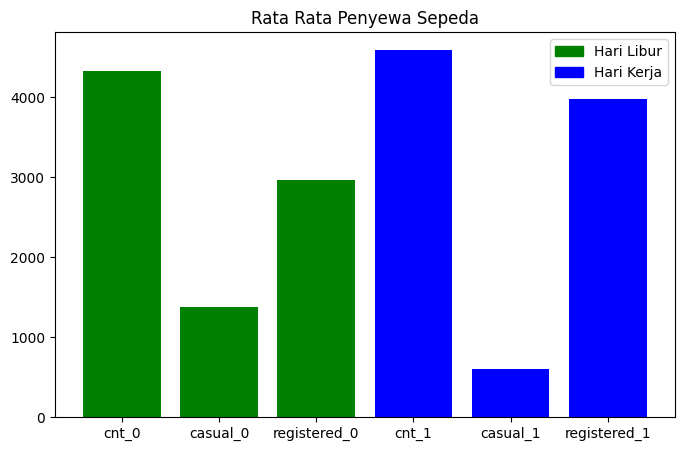

In [9]:
import matplotlib.pyplot as plt

result = day_df.groupby("workingday").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
})

colors = ['green' if idx == 0 else 'blue' for idx in result.index for col in result.columns]

categories = [f"{col}_{idx}" for idx in result.index for col in result.columns]
values = result.values.flatten()

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=colors * len(result.columns))

plt.title('Rata Rata Penyewa Sepeda')

import matplotlib.patches as mpatches

green_patch = mpatches.Patch(color='green', label='Hari Libur')
blue_patch = mpatches.Patch(color='blue', label='Hari Kerja')

plt.legend(handles=[green_patch, blue_patch])

plt.show()


**Insight:**
- Pada visualisasi pertama saya membuat scatter plot menggunakan seaborn dimana nilai untuk menentukan koordinat `x` adalah kolom `temp` dan koordinat `y` adalah `cnt`.
- Untuk visualisasi kedua saya menggunakan bar chart. Bar chart tersebut menggunakan nilai mean dari 3 kolom yaitu `cnt`, `casual`, dan `registered`. Pada bar chart yang saya buat dari ketiga kolom tersebut ada 2 warna yaitu biru dan hijau. Bar yang berwarna hijau berarti nilai dari `workingday` adalah 0 dan bar yang berwarna biru berarti nilai dari `workingday` adalah 1.
Supaya lebih jelas bar `cnt_0`, `casual_0`, dan `registered_0` berwarna hijau dan bar `cnt_1`, `casual_1`, dan `registered_1` berwarna biru.

## Analisis Lanjutan (Opsional)

In [ ]:
print("covariance antara temp dan cnt:", temp.cov(cnt))
print()
print("covariance antara workingday dan cnt:", workingday.cov(cnt))
print()
print("covariance antara workingday dan casual:", workingday.cov(casual))
print()
print("covariance antara workingday dan registered:", workingday.cov(registered))
print()

covariance antara temp dan cnt: 222.51470045305507

covariance antara workingday dan cnt: 55.11723478814906

covariance antara workingday dan casual: -165.4838839645447

covariance antara workingday dan registered: 220.60111875269388



## Conclusion

- Conclution pertanyaan 1:

Kolom `temp` nyatanya sangat berpengaruh karena kalau kita lihat scatter plotnya keliatan bahwa datanya membentuk garis yang miring ke arah kanan atas yang berarti dengan meningkatnya suhu, jumlah total penyewa juga meningkat. Ini juga bisa di buktikan menggunakan fungsi `cov()` yang untuk menghitung covariance. Fungsi tersebut mengeluarkan nilai positif (`222.51`) yang berarti begitu meningkatnya sebuah nilai, nilai yang sebelahnya ikut meningkat.

- Conclution pertanyaan 2:

`workingday` juga dapat memengaruhi `cnt`. Ini karena kebutuhan transportasi, khususnya untuk perkerja dengan jadwal yang ketat. Saya tahu ini karena pada hari kerja yaitu hari senin sampai dengan jumat jumlah user `registered` lebih banyak dibandingkan hari libur dan ini bisa dibuktikan lagi dengan fungsi `cov()` yang mengembalikan nilai positif juga. Untuk user `casual` yang hanya menyewa sekali kali, nilai ini malah meningkat pada hari libur dan menurun pada hari kerja. Ini juga dapat dilihat pada hasil covariance yang mengeluarkan nilai  negatif.